# Final Capstone Exploratory Data Analysis

With a dataset collected from eBay Kleinanzeigan (German eBay) and found on Kaggle.com, I explore the potential of this dataset to predict the price of a used car. The variables are familiar ones, but in German. They include: type of vehicle, gearbox, mileage, brand, and more. Let's get into it!

https://www.kaggle.com/orgesleka/used-cars-database/home

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autos_import = pd.read_csv("autos.csv", error_bad_lines=False, engine='python')

Skipping line 5263: ',' expected after '"'
Skipping line 14386: ',' expected after '"'
Skipping line 15168: ',' expected after '"'
Skipping line 17600: ',' expected after '"'
Skipping line 22156: ',' expected after '"'
Skipping line 22864: ',' expected after '"'
Skipping line 23697: ',' expected after '"'
Skipping line 31244: ',' expected after '"'
Skipping line 33504: ',' expected after '"'
Skipping line 34602: ',' expected after '"'
Skipping line 40607: ',' expected after '"'
Skipping line 47669: ',' expected after '"'
Skipping line 49557: ',' expected after '"'
Skipping line 55102: ',' expected after '"'
Skipping line 59644: ',' expected after '"'
Skipping line 60996: ',' expected after '"'
Skipping line 62910: ',' expected after '"'
Skipping line 68072: ',' expected after '"'
Skipping line 73313: ',' expected after '"'
Skipping line 74141: ',' expected after '"'
Skipping line 75706: ',' expected after '"'
Skipping line 80511: ',' expected after '"'
Skipping line 81415: ',' expected

In [3]:
autos = autos_import.copy()

In [4]:
# Convenient translations
key_terms = {'privat' : 'private',
               'gewerblich' : 'commercial',
               'angebot' : 'bid',
               'gesuch' : 'buy now',
               'kleinwagen' : 'small car',
               'kombi' : 'station wagon',
               'andere' : 'other',
               'manuell' : 'manual',
               'automatik' : 'automatic',
               'benzin' : 'gasoline',
               'nein' : 'no',
               'ja' : 'yes',
}

## Sweeping Exploration

In [5]:
autos.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371452,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371453,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371454,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371455,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371456,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [6]:
# Already some silliness going on.
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.714570e+05,371457.000000,371457.000000,371457.000000,371457.000000,371457.0,371457.000000
mean,1.729780e+04,2004.578603,115.556221,125617.541196,5.734610,0.0,50822.358650
std,3.588297e+06,92.875411,192.155494,40112.798219,3.712313,0.0,25799.298421
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71549.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371457 entries, 0 to 371456
Data columns (total 20 columns):
dateCrawled            371457 non-null object
name                   371457 non-null object
seller                 371457 non-null object
offerType              371457 non-null object
price                  371457 non-null int64
abtest                 371457 non-null object
vehicleType            333600 non-null object
yearOfRegistration     371457 non-null int64
gearbox                351256 non-null object
powerPS                371457 non-null int64
model                  350980 non-null object
kilometer              371457 non-null int64
monthOfRegistration    371457 non-null int64
fuelType               338084 non-null object
brand                  371457 non-null object
notRepairedDamage      299411 non-null object
dateCreated            371457 non-null object
nrOfPictures           371457 non-null int64
postalCode             371457 non-null int64
lastSeen              

In [8]:
# Getting an idea of how many unique/missing items we have.
print('length', len(autos))
for item in autos.columns:
    print(item, "Unique items: ", autos[item].nunique(), 'Missing: ', (len(autos) - autos[item].count()))
    

length 371457
dateCrawled Unique items:  280461 Missing:  0
name Unique items:  233461 Missing:  0
seller Unique items:  2 Missing:  0
offerType Unique items:  2 Missing:  0
price Unique items:  5597 Missing:  0
abtest Unique items:  2 Missing:  0
vehicleType Unique items:  8 Missing:  37857
yearOfRegistration Unique items:  155 Missing:  0
gearbox Unique items:  2 Missing:  20201
powerPS Unique items:  794 Missing:  0
model Unique items:  251 Missing:  20477
kilometer Unique items:  13 Missing:  0
monthOfRegistration Unique items:  13 Missing:  0
fuelType Unique items:  7 Missing:  33373
brand Unique items:  40 Missing:  0
notRepairedDamage Unique items:  2 Missing:  72046
dateCreated Unique items:  114 Missing:  0
nrOfPictures Unique items:  1 Missing:  0
postalCode Unique items:  8150 Missing:  0
lastSeen Unique items:  182771 Missing:  0


## Variable by Variable Exploration

### name
- This is the name of the posting.
- There are hundreds of thousands of different names. Unless I can extract information from them, they wont be nearly as useful as the vehicle's make or model.
- Some people used the same name for their postings so it will not work as the ID column

### seller

In [9]:
autos['seller'].value_counts()

privat        371454
gewerblich         3
Name: seller, dtype: int64

- There are only two types of sellers, private and commercial.
- This variable is quite imbalanced. Only 3 postings were commercial.
- The commercial postings are so few that I will toss them out completely.

### offerType

In [10]:
autos['offerType'].value_counts()

Angebot    371445
Gesuch         12
Name: offerType, dtype: int64

- There are two types of offers. Bids and buy now offers.
- Bidding is the main competitive advantage of eBay and what this project seeks to take advantage of.
- Buy now offers are too few. I will not be using them.

### abtest

In [11]:
autos['abtest'].value_counts()

test       192553
control    178904
Name: abtest, dtype: int64

- Includes two fairly even categories; test and control.
- It is completely unclear what this variable means or whether it will have predictive power.
- I intend to ignore it completely.

### vehicleType
- There are 8 different vehicle types.
- Roughly 10% of the postings do not include the vehicle type.

### yearOfRegistration
- There are 155 unique values in the year of registration column--more distinct years than cars have existed.
- I will have to do something about the postings that include impossible years.

### gearbox

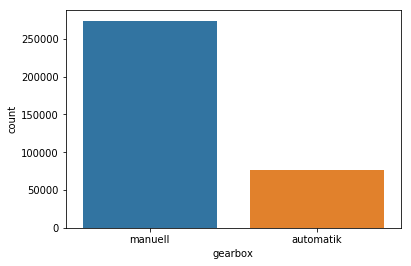

In [12]:
sns.countplot(autos.gearbox)

- Manual/Automatic
- This is europe so most of the cars are manual.

### powerPS

In [13]:
autos.powerPS.describe()

count    371457.000000
mean        115.556221
std         192.155494
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


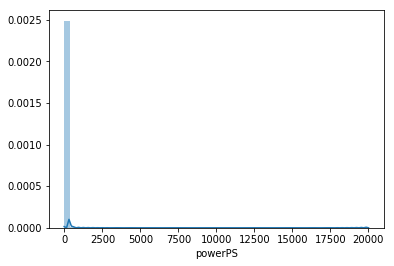

In [14]:
sns.distplot(autos.powerPS)

In [15]:
len(autos[autos.powerPS == 0])

40803

- PS is the German abbreviation for horse-power.
- 32804 of the entries are 0. This could either mean that these cars are busted/antique (in which case I would expect them to also be listed as having notRepairedDamage) or the average person does not know or care about the strength of their car (I sure don't).
- Someone else listed 20000 which seems like a mistake.
- Perhaps I can impute the proper value for a lot of these cars and allow the notRepairedDamage do the talking about whether the car is functioning or not.

In [16]:
autos[autos.powerPS == 20000]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
230249,2016-03-09 15:43:53,Mercedes_CLK_430___8_Zylinder_,privat,Angebot,4300,control,coupe,1999,automatik,20000,clk,150000,1,benzin,mercedes_benz,nein,2016-03-09 00:00:00,0,19406,2016-03-30 08:47:08


In [17]:
# I will impute missing or outrageous numbers using the model.
# You can see this below after I have filled in as many of the missing models as I can.
autos[autos.model == 'clk']['powerPS'].median()

184.0

### model
- Roughly 5% of postings do not include the model.
- If I cannot impute the model for a given listing, it will have to be dropped because it is too important a feature.
- It might be inferrable from the name of the posting.
- There are 251 unique model names entered.

### kilometer

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

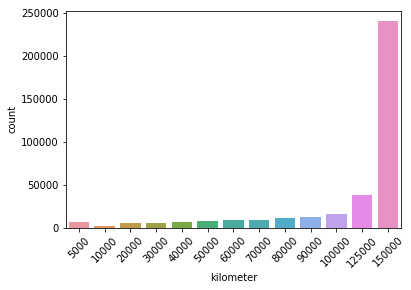

In [18]:
sns.countplot(autos.kilometer)
plt.xticks(rotation=45)

- Users could not enter a custom number as evidenced by there only being 13 categories.
- The vast majority of cars on eBay are being sold with 150k+ kilometers. (93k+ miles)

### monthOfRegistration

In [19]:
autos.monthOfRegistration.value_counts()

0     37658
3     36167
6     33162
4     30914
5     30625
7     28955
10    27334
11    25482
12    25376
9     25071
1     24557
8     23760
2     22396
Name: monthOfRegistration, dtype: int64

- Quite a few of these cars were registered on the 0th month of the year.
- Luckily, this category intuitively is not one of great predictive importance given that it has 13 months.

### fuelType

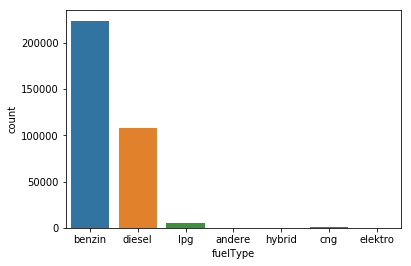

In [20]:
sns.countplot(autos.fuelType)

- Benzin is gasoline to Americans.
- Gas and diesel dominate the postings.
- We should be wary about the other types of cars because of the smaller sample size.

### brand

In [21]:
autos.brand.value_counts()

volkswagen        79621
bmw               40272
opel              40128
mercedes_benz     35302
audi              32871
ford              25567
renault           17967
peugeot           11023
fiat               9671
seat               7021
mazda              5692
skoda              5640
smart              5247
citroen            5182
nissan             5037
toyota             4693
sonstige_autos     3980
hyundai            3645
mini               3393
volvo              3326
mitsubishi         3061
honda              2836
kia                2554
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1844
chrysler           1451
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

- There are 40 brands with at least 225 listings each.
- Volkswagen has nearly twice the number of listings as the second most common brand.

### notRepairedDamage

In [22]:
autos.notRepairedDamage.value_counts()

nein    263139
ja       36272
Name: notRepairedDamage, dtype: int64

- This category tells us whether the car is currently damaged.
- 'nein' in this category could either mean the car was never damaged or that it has been repaired already.

### dateCreated
- The listings were created on 114 unique dates.

###   nrOfPictures

In [23]:
autos.nrOfPictures.value_counts()

0    371457
Name: nrOfPictures, dtype: int64

- This variable tells us nothing useful for predicting as there is 0 variance.

### postalCode
- There are 8150 unique items in this category.
- It could be interesting to see if the same cars sell for more/less in different postal codes.
- It could also be interesting if more expensive cars/different brands are more common in different neighborhoods.
- However interesting, this is outside the scope of my project. I will drop this variable.

### lastSeen
- This tells us when the crawler last saw the posting online.
- I'm not interested in this.

### price

In [24]:
autos.price.describe()

count    3.714570e+05
mean     1.729780e+04
std      3.588297e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [25]:
len(autos[autos.price == 0])

10770

- This is the outcome variable that we are trying to predict.
- 10770 of these listings are 0. Another is over 2 million euros. Extreme prices will have to be tossed.


## Variable by Variable Exploration Summary

Many columns either have extremely low variance or are not relevant for my use-case and I will eliminate them now. They are:
- seller
- offerType
- abtest
- monthOfRegistration
- nrOfPictures
- lastSeen

The following variables need to be cleaned up because my investigation found nonsensical/missing data:
- vehicleType
- yearOfRegistration
- powerPS
- model
- price

In [26]:
# Dropping irrelevant/low variance columns
autos = autos[autos.seller == 'privat']
autos = autos[autos.offerType == 'Angebot']
autos = autos.drop(columns=['abtest', 'monthOfRegistration', 'nrOfPictures', 'lastSeen', 'seller', 'offerType'])

In [27]:
# Dropping ridiculous prices
autos = autos[autos.price < 200000]
autos = autos[autos.price > 50]

### Missing Models

In [28]:
print("Before imputation, there are {} missing models".format(len(autos[autos.model.isna()])))

# Creating a dictionary that has "brand" : "list of models for that brand" as the entries
brand_models = {}
for brand in autos.brand.unique():
    brand_models[brand] = list(autos[autos.brand == brand]['model'].dropna().unique())

    
def impute_model(brand, name):
    '''Takes info from brand and name column and (if it exists) tells us the name of the model from that brand that appears in the name.'''
    for i in brand_models[brand]:
        if i in name.lower():
            return i

# Here I apply the impute_model function to my dataframe to reduce the missing models.
for i in range(len(autos)):
    try:
        if type(autos.loc[i, 'model']) == float:
            autos.loc[i, 'model'] = impute_model(autos.loc[i, 'brand'], autos.loc[i, 'name'])
    except KeyError: pass
    
print("After imputation, there are {} missing models".format(len(autos[autos.model.isna()])))

Before imputation, there are 17830 missing models
After imputation, there are 10186 missing models


I'm happy with that. The model of a car is so crucial to estimating its price that I will be dropping the model-less listings now. I also removed several useless columns and got rid of the listings with unreasonably high or low prices.

In [29]:
autos = autos.dropna(subset=['model'])

In [30]:
autos.head()

,dateCrawled,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,2016-03-24 11:52:17,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,a5,125000,diesel,audi,ja,2016-03-24 00:00:00,66954
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,2016-03-14 00:00:00,90480
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,91074
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,60437


### Missing vehicleTypes

In [31]:
print("Before imputation, there are {} missing vehicleTypes".format(len(autos[autos.vehicleType.isna()])))

Before imputation, there are 30227 missing vehicleTypes


I will attempt to fill this in using the model of the car. Some models come in different vehicle types as evidenced by the different vehicle types for the Volkswagen Golf:

In [32]:
autos[autos.model == 'golf']['vehicleType'].value_counts()

limousine     15304
kleinwagen     3964
kombi          3280
cabrio         2027
bus             798
coupe           430
andere          190
suv              26
Name: vehicleType, dtype: int64

In [33]:
# Creating a dictionary that can be seen in the next cell
missing_vehicle_type = list(autos[autos.vehicleType.isna()]['model'].unique())

model_type_percentage = {}
for model in missing_vehicle_type:
    model_type_percentage[model] = (autos[autos.model == model]['vehicleType'].value_counts().idxmax(), (autos[autos.model == model]['vehicleType'].value_counts().max())/len(autos[autos.model == model]))

In [34]:
# Tells me, e.g., the model '100' is listed as a limousine 66.3 percent of the time.
model_type_percentage

{'100': ('limousine', 0.6634382566585957),
 '145': ('kleinwagen', 0.40816326530612246),
 '147': ('limousine', 0.6213921901528013),
 '156': ('kombi', 0.46774193548387094),
 '159': ('kombi', 0.6919431279620853),
 '1_reihe': ('kleinwagen', 0.8390166534496432),
 '1er': ('limousine', 0.7298640167364017),
 '200': ('limousine', 0.8421052631578947),
 '2_reihe': ('kleinwagen', 0.5215744053883393),
 '300c': ('kombi', 0.4965034965034965),
 '3_reihe': ('limousine', 0.4098888238736103),
 '3er': ('limousine', 0.40734230614704703),
 '4_reihe': ('kombi', 0.4718196457326892),
 '500': ('kleinwagen', 0.6572972972972972),
 '5_reihe': ('bus', 0.7494356659142212),
 '5er': ('limousine', 0.5761262346422549),
 '601': ('limousine', 0.4253164556962025),
 '6_reihe': ('kombi', 0.5098502758077226),
 '6er': ('coupe', 0.6081632653061224),
 '7er': ('limousine', 0.9339366515837104),
 '80': ('limousine', 0.6266499057196732),
 '850': ('kombi', 0.861244019138756),
 '90': ('limousine', 0.7628865979381443),
 '900': ('cabrio

I will use the most common model to impute the missing vehicleTypes.

In [35]:
# Same as the dictionary above but not including the percentages
model_type = {}
for model in missing_vehicle_type:
    model_type[model] = (autos[autos.model == model]['vehicleType'].value_counts().idxmax())

In [36]:
# vt_fill is only used in this cell so that I can quickly fill in the vehicleType column using fillna
vt_fill = autos.model.map(model_type)
autos.vehicleType = autos.vehicleType.fillna(vt_fill)

In [37]:
print("After imputation, there are {} missing vehicleTypes".format(len(autos[autos.vehicleType.isna()])))

After imputation, there are 0 missing vehicleTypes


### Zero or Outrageous powerPS

I will fill in the silly values with the median horsepower for that model.

In [38]:
# Dictionary of every model and the median horsepower for that model
# The whole point is to correct outliers, so I will use median instead of mean.
model_powerPS = {}
for model in autos.model.unique():
    model_powerPS[model] = autos[autos.model == model]["powerPS"].median()

In [39]:
# I will be using fillna down the line, so I want to first mark the silly values with None.
autos.powerPS = autos.powerPS.where(autos.powerPS > 10, None)
autos.powerPS = autos.powerPS.where(autos.powerPS < 5000, None)

In [40]:
len(autos[autos.powerPS.isna()])

33030

In [41]:
ps_fill = autos.model.map(model_powerPS)
autos.powerPS = autos.powerPS.fillna(ps_fill)

In [42]:
len(autos[autos.powerPS.isna()])

0

In [43]:
autos.powerPS.describe()

count    348343.000000
mean        124.676107
std          71.695772
min           0.000000
25%          77.000000
50%         114.000000
75%         150.000000
max        4700.000000
Name: powerPS, dtype: float64

### Silly yearOfRegistration

In [44]:
print(len(autos[autos.yearOfRegistration < 1930])+len(autos[autos.yearOfRegistration > 2019]))

123


In [45]:
def remove_silly_years(year):
    if year > 2019:
        return None
    elif year < 1930:
        return None
    else:
        return year

In [46]:
# Replacing the silly years with None
autos['yearOfRegistration'] = autos['yearOfRegistration'].apply(lambda x: remove_silly_years(x))

# Dropping all the silly years from the dataset
autos = autos.dropna(subset=['yearOfRegistration'])

# Creating a more useful column that represents how old the car is rather than the year it was made.
autos['age'] = 2018 - autos.yearOfRegistration

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'age of car')

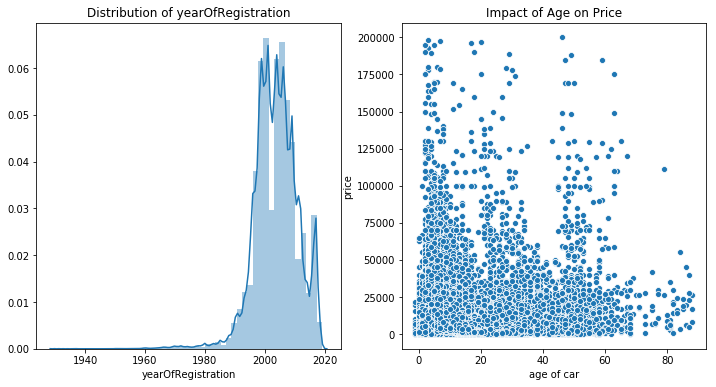

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(autos.yearOfRegistration.dropna())
plt.title("Distribution of yearOfRegistration")

plt.subplot(1,2,2)
plt.title('Impact of Age on Price')
sns.scatterplot(autos.age, autos.price)
plt.xlabel('age of car')

### Round 2 of exploration and cleaning
Before imputing any of the remaining missing values, I would like to investigate how those variables impact the outcome of interest. I do that below with plots.

In [48]:
for item in autos:
    print(item, (len(autos) - autos[item].count()))

dateCrawled 0
name 0
price 0
vehicleType 0
yearOfRegistration 0
gearbox 14942
powerPS 0
model 0
kilometer 0
fuelType 25780
brand 0
notRepairedDamage 61352
dateCreated 0
postalCode 0
age 0


In [49]:
def plot_price_impact(col):
    unique = list(autos[col].unique())
    placeholder_list = []
    for item in unique:
        placeholder_list.append(autos[autos[col] == item].price.mean())
    
    if autos[col].isna().any():
        unique.append('blank')
        placeholder_list.append(autos[autos[col].isna()]['price'].mean())
    sns.barplot(x=unique, y=placeholder_list)
    plt.title('{} impact on price'.format(col))
    plt.ylabel("price")
    plt.xticks(rotation=45)

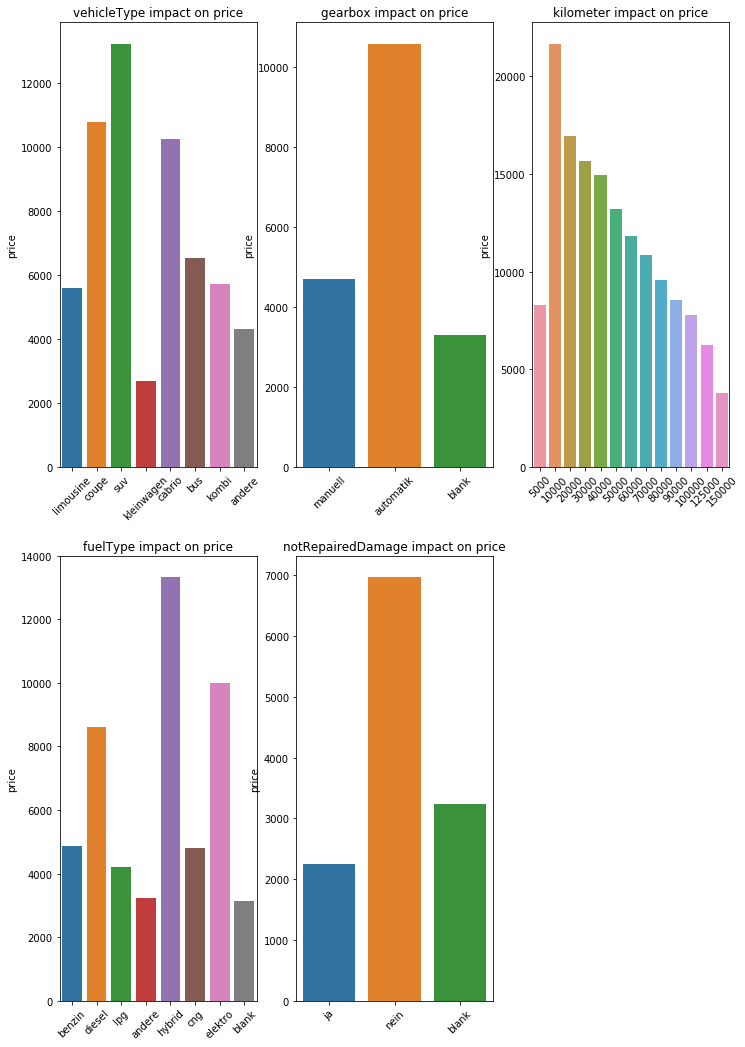

In [50]:
check_price_impact = ['vehicleType', 'gearbox', 'kilometer', 'fuelType', 'notRepairedDamage']

plt.figure(figsize=(12,18))
n = 1
for i in check_price_impact:
    plt.subplot(2,3,n)
    plot_price_impact(i)
    n+=1

These plots tell me which cars are the most expensive based on various features. Interesting points:
- Suv's are the most expensive cars and small cars (kleinwagens) are the least expensive.
- Listings that are vehicleType-less are nearly priced the same as the cheapest cars.
- Not including gearbox info corresponds with cars that are cheaper than even manual cars, which are roughly half the price of the automatics on average.
- There is a clear relationship between kilometers driven and the price of the car. However cars with under 5000 kilometers are significantly cheaper than those with 10000 miles. It's almost as if people are lying.
- FuelType and notRepairedDamage have strong impacts on the price of a car. These will be good features.

It would appear that leaving info blank could be as telling as the actual information. For 'gearbox' for example, I will try imputing missing values with the string 'blank' and see what impact it has on the accuracy of my future models.

In [51]:
for i in check_price_impact:
    autos[i] = autos[i].fillna(value='blank')

In [52]:
autos = autos.dropna()
autos = autos.reset_index(drop=True)

Before exporting this cleaned dataset, I unfortunately must limit the unique car models. This is because car model is a highly important variable and some of the cars do not appear often enough for it to be reliable or computationally efficient to include them.

In [53]:
models_to_keep = []
for i in autos['model'].unique():
    if autos['model'].value_counts()[i] > 500:
        models_to_keep.append(i)

In [54]:
print("So I am keeping the {} most common models.".format(len(models_to_keep)))

So I am keeping the 102 most common models.


In [55]:
common_autos = autos.loc[autos['model'].isin(models_to_keep)]

In [56]:
common_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315132 entries, 0 to 348218
Data columns (total 15 columns):
dateCrawled           315132 non-null object
name                  315132 non-null object
price                 315132 non-null int64
vehicleType           315132 non-null object
yearOfRegistration    315132 non-null float64
gearbox               315132 non-null object
powerPS               315132 non-null float64
model                 315132 non-null object
kilometer             315132 non-null int64
fuelType              315132 non-null object
brand                 315132 non-null object
notRepairedDamage     315132 non-null object
dateCreated           315132 non-null object
postalCode            315132 non-null int64
age                   315132 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 38.5+ MB


In [57]:
autos_export = common_autos.copy().drop(columns=['dateCrawled', 'yearOfRegistration', 'dateCreated', 'postalCode'])

In [58]:
autos_export.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,Golf_3_1.6,480,limousine,manuell,101.0,golf,150000,benzin,volkswagen,blank,25.0
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190.0,a5,125000,diesel,audi,ja,7.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163.0,grand,125000,diesel,jeep,blank,14.0
3,GOLF_4_1_4__3T�RER,1500,kleinwagen,manuell,75.0,golf,150000,benzin,volkswagen,nein,17.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69.0,fabia,90000,diesel,skoda,nein,10.0


In [59]:
autos_export.to_csv('autos_export.csv')